# TP 2. Regression linéaire from scratch :
## TP 2.3. Descente du gradient (Regression linéaire)


## Objectif 
Automatiser le processus d'apprentissage des w et b par descente du gradient

In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

<a name="1"></a>
## 1- Dataset 
On repart avec les mêmes données 

| taille (1000 )     | Prix (1000s de dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

## 2- Fonction coût
On reprend la version déjà vue en TP

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## 3- Désente du gradient 
### 3.1 Rappel de la descente de gradient
Jusqu'à présent dans ce cours, vous avez développé un modèle linéaire qui prédit $f_{w,b}(x^{(i)})$ :
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
Dans la régression linéaire, vous utilisez les données d'apprentissage en entrée pour ajuster les paramètres $w$,$b$ en minimisant une mesure de l'erreur entre nos prédictions $f_{w,b}(x^{(i)})$ et les données réelles $y^{(i)}$. Cette mesure s'appelle le $coût$, $J(w,b)$. 
Lors de l'apprentissage, vous mesurez le coût sur tous les échantillons d'apprentissage $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$


la *descente de gradient* a été décrite comme suit :

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

où les paramètres $w$, $b$ sont mis à jour simultanément.  
Le gradient est défini comme suit :
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Ici, *simultanément* signifie que vous calculez les dérivées partielles pour tous les paramètres avant de mettre à jour l'un d'entre eux.

### 3.2 Mise en œuvre de la descente de gradient
Vous allez mettre en œuvre l'algorithme de descente de gradient pour une seule caractéristique. Vous aurez besoin de trois fonctions. 
- `compute_cost` implémentant l'équation (2) ci-dessus (code du laboratoire précédent)
- `compute_gradient` implémentant les équations (4) et (5) ci-dessus
- `gradient_descent`, utilisant compute_gradient et compute_cost

**Conventions**:
- Le nom des variables python contenant des dérivées partielles suit ce modèle, $\frac{\partial J(w,b)}{\partial b}$ sera `dj_db`.


#### Question 1 : 
Ecrire ci dessous le code de compute_gradient (les équations (4) et (5)

In [4]:
## Ecrire ici le code de compute_gradient 

def compute_gradient(x, y, w, b):

    """
    Calcule le gradient pour la régression linéaire 
    Args :
      x (ndarray (m,)) : données, m exemples 
      y (ndarray (m,)) : valeurs cibles
      w,b (scalaire) : paramètres du modèle  
    Résultats
      dj_dw (scalaire) : Le gradient du coût par rapport au(x) paramètre(s) w
      dj_db (scalaire) : Le gradient du coût par rapport au paramètre b     
     """

    # Number of training examples
    m = x.shape[0]  
    # initialiser dj_dw et dj_db
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i]+b
        dj_dw_i = f_wb-y[i]*x[i]
        dj_db_i = f_wb-y[i]
        dj_db += dj_db_i
        dj_dw +=  dj_dw_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
        
    return dj_dw, dj_db

#### Question 2 : 
Maintenant que les gradients sont calculés, la descente de gradient, décrite dans l'équation (3) ci-dessus, peut être implémentée ci-dessous dans `gradient_descent`. 

Ecrire le code de la fonction gradient_descent

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    
    """
    Effectue une descente de gradient pour ajuster w,b. Met à jour w,b en prenant 
    num_iters pas de gradient avec un taux d'apprentissage alpha
    
    Args :
      x (ndarray (m,)) : Données, m exemples 
      y (ndarray (m,)) : valeurs cibles
      w_in,b_in (scalaire) : valeurs initiales des paramètres du modèle  
      alpha (float) :     Taux d'apprentissage
      num_iters (int) : nombre d'itérations pour exécuter la descente de gradient
      cost_function : fonction à appeler pour produire le coût
      gradient_function : fonction à appeler pour produire le gradient
      
    Retourne :
      w (scalaire) : Valeur mise à jour du paramètre après l'exécution de la descente de gradient
      b (scalaire) : Valeur mise à jour du paramètre après l'exécution de la descente de gradient
      J_history (Liste) : Historique des valeurs de coût
      p_history (liste) : Historique des paramètres [w,b] 
      """

    w = copy.deepcopy(w_in) # évite la modification de w_in
    
    # Un tableau pour stocker les coûts J et w à chaque itération, 
    # principalement pour la représentation graphique ultérieure.
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculer le gradient et mettre à jour les paramètres en utilisant gradient_function=copute_gradient
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Mise à jour des paramètres en utilisant l' equation (3) 
        b = w - alpha * dj_db
        w = w - alpha * dj_dw

        # Save le coût J à chaque itération
        if i<100000:      
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
            
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

#### Le code principal qui fait appel à la fonction gradient_descent 

In [6]:
# initialize parameters
w_init = 0
b_init = 0
# initialisation du nombre d'itérations et la vitesse d'apprentissage.
iterations = 10000
tmp_alpha = 1.0e-2

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print("***********************************")
print(f"(w,b) les valeurs de w et b  ({w_final:8.4f},{b_final:8.4f})")
print("***********************************")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost 3.17e+04  dj_dw: -6.595e-09, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 2000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 3000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 4000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 5000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 6000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 7000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 8000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02
Iteration 9000: Cost 3.17e+04  dj_dw: -2.842e-12, dj_db:  2.500e+02   w:  2.610e+02, b: 2.58500e+02


<details>
<summary>
    <font size='3', color='darkgreen'><b>Constat ---> Cliquez ici</b></font>
</summary>
    <p>
    <ul>
Notez certaines caractéristiques du processus de descente de gradient listé ci-dessus.  

- Le coût commence par être élevé et diminue rapidement.
- Les dérivées partielles, `dj_dw`, et `dj_db` deviennent également plus petites, rapidement au début, puis plus lentement. .
- la progression ralentit bien que le taux d'apprentissage, alpha, reste fixe
</ul>

    


### 3.3 Coût en fonction des itérations de la descente de gradient 
Un graphique du coût en fonction du nombre d'itérations est une mesure utile pour visualiser la progression de la descente de gradient. Le coût doit toujours diminuer lorsque les itérations sont réussies. Le changement de coût est si rapide au départ qu'il est utile de représenter la descente initiale sur une échelle différente de celle de la descente finale. Dans les graphiques ci-dessous, notez l'échelle du coût sur les axes et le pas d'itération.

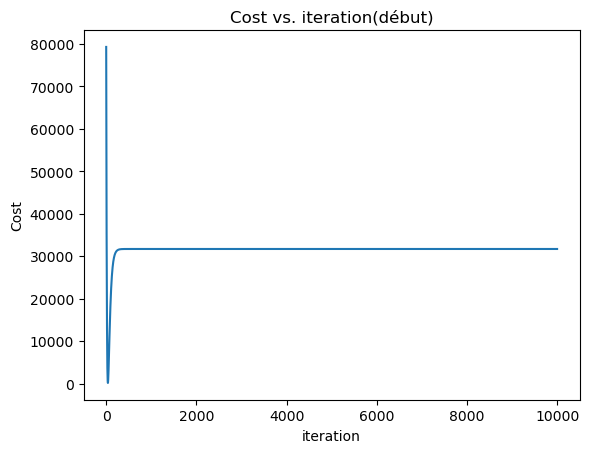

In [7]:
import matplotlib.pyplot as plt
# plot cost versus iteration  
#fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
plt.plot(J_hist)

plt.title("Cost vs. iteration(début)")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('iteration')
#plt.legend()

plt.show()

<details>
<summary>
    <font size='3', color='darkgreen'><b>Constat ---> Cliquez ici</b></font>
</summary>
    <p>
    <ul>
Difficile d'analyser la courbe. En fait ça déscend très vide les débuts, puis elle ralentit. 
Pour mieux visuaiser le cout, on trace deux graphiques, le premier représente, le cout au début, pr exemple les 100 premières valeurs de J_hist le deuxième regarde les dernières valeurs à partir de 1000.
</ul>

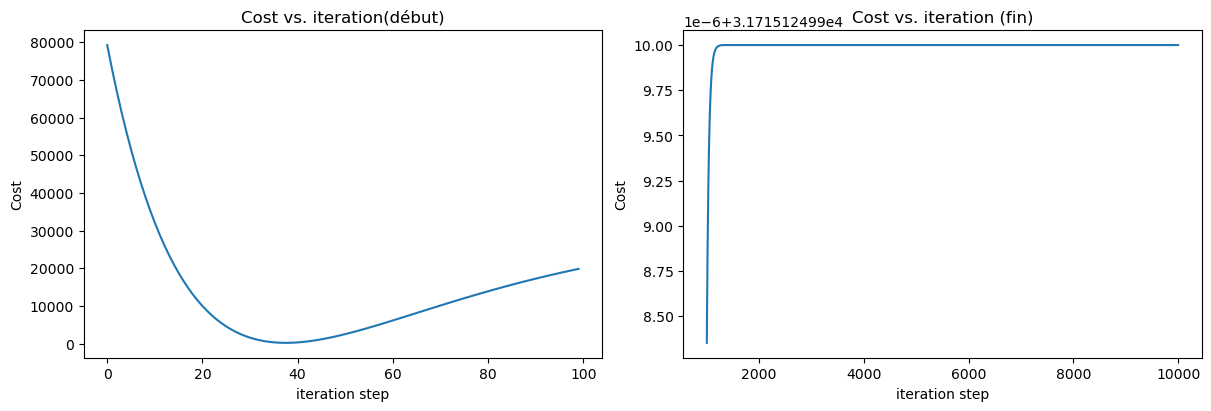

In [8]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(début)");  ax2.set_title("Cost vs. iteration (fin)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## 4. Prédictions

On a trouvé les valeurs optimales des paramètres $w$ et $b$, vous pouvez utiliser le modèle pour prédire les valeurs des logements sur la base des paramètres appris. Comme prévu, les valeurs prédites sont presque identiques aux valeurs d'apprentissage pour le même logement. En outre, la valeur qui ne figure pas dans la prédiction correspond à la valeur attendue.

In [9]:
print(f"100 m2 house prédiction {w_final*1.0 + b_final:0.1f} Thousand euros")
print(f"120 m2 house prediction {w_final*1.2 + b_final:0.1f} Thousand euros")
print(f"200 m2 house prediction {w_final*2.0 + b_final:0.1f} Thousand euros")

100 m2 house prédiction 519.5 Thousand euros
120 m2 house prediction 571.7 Thousand euros
200 m2 house prediction 780.5 Thousand euros


<a name="5"></a>
## 5. Impact du taux d'apprentissage/Learning Rate

Dans le cours, il y a eu une discussion sur la valeur appropriée du taux d'apprentissage, $\alpha$ dans l'équation(3). Plus $\alpha$ est grand, plus la descente de gradient convergera rapidement vers une solution. Mais s'il est trop grand, la descente de gradient divergera. Ci-dessus, vous avez un exemple de solution qui converge bien.

### Question : 
Augmenter la valeur de $\alpha$ (par exemple $tmp\_alpha=0.8$) et regarder ce qui se passe.

In [10]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 1000

tmp_alpha = 0.8
# run gradient descent
w, b, j_history, p_history = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)



Iteration    0: Cost 2.58e+05  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  100: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  200: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  300: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  400: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  500: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  600: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  700: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  800: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02
Iteration  900: Cost 2.58e+05  dj_dw: -4.500e+02, dj_db: -2.000e+02   w:  5.200e+02, b: 3.20000e+02


#### Que remarquez vous ?
Tracer la courbe coût versus itération,  
Quelles sont les bonnes valeurs des paramètres $w$ et $b$ ? 

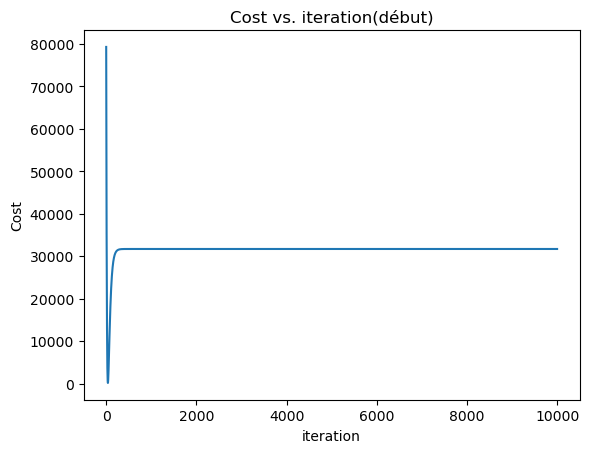

In [11]:
# plot cost versus iteration  
#fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
plt.plot(J_hist)

plt.title("Cost vs. iteration(début)")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('iteration')
#plt.legend()

plt.show()

### Exercice
Réecrire les code des fonctions, `compute_cost`, `compute_gradient`, `gradient_descent`en utilisant une vectorisation. 
Vérifier votre code (appel de la cellule comportant le code)